In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle =True,
    image_size =(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 1 0 2 0 1 1 1 0 1 1 1 1 0 0 0 0 1 2 0 1 1 0 1 1 0 1 1 1]


In [7]:
#32 is number of images in 1 batch, size =256*256, RGB channelskk

In [8]:
#printing first image-----(numpy array of 0 to 255)
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[141., 115., 102.],
        [136., 110.,  97.],
        [133., 107.,  94.],
        ...,
        [142., 114., 100.],
        [134., 106.,  92.],
        [121.,  93.,  79.]],

       [[144., 118., 105.],
        [146., 120., 107.],
        [146., 120., 107.],
        ...,
        [133., 105.,  91.],
        [126.,  98.,  84.],
        [116.,  88.,  74.]],

       [[148., 122., 109.],
        [149., 123., 110.],
        [148., 122., 109.],
        ...,
        [123.,  95.,  81.],
        [119.,  91.,  77.],
        [115.,  87.,  73.]],

       ...,

       [[181., 157., 147.],
        [181., 157., 147.],
        [182., 158., 148.],
        ...,
        [163., 137., 124.],
        [161., 135., 122.],
        [159., 133., 120.]],

       [[181., 157., 147.],
        [181., 157., 147.],
        [181., 157., 147.],
        ...,
        [165., 139., 126.],
        [162., 136., 123.],
       

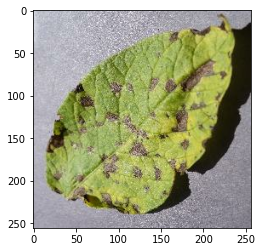

In [9]:
#visualize
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

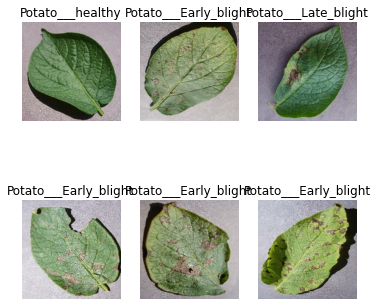

In [10]:
#visualize
plt.figure(figsize=(6,6))
for image_batch, label_batch in dataset.take(1):
    for i in range(6):
        ax = plt.subplot(2,3, i +1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])

In [11]:
len(dataset)

68

In [12]:
EPOCHS = 50

In [15]:
# 80% training 
# 10% validation
# 10% testing


train_size = 0.8
len(dataset)*train_size


54.400000000000006

In [16]:
train_ds = dataset.take(54)
len(train_ds)

54

In [22]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [23]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [24]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [29]:
def get_partition_dataset_tf(ds,train_split=0.8,val_split=0.1,test_split = 0.1, shuffle_size=10000):
    ds_size = len(ds)
    
#     if shuffle:
#         ds= ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = int(test_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds,test_ds

In [32]:
train_ds,val_ds,test_ds = get_partition_dataset_tf(dataset)
len(train_ds)


54

In [33]:
len(test_ds)


8

In [34]:
len(val_ds)

6

In [36]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [39]:
#data augmentaion

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [14]:
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape = input_shape)

NameError: name 'resize_and_rescale' is not defined

In [ ]:
model.summary()

In [ ]:
#Compiling The Model
#Using adamOptimizer, SparseCategoricalCrossentropy for losses,accuracy as metric

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1,
    epochs = 50
)